# If you would like to learn how to use contact me on twitter. 

<h2><a href="https://twitter.com/Miau_DB"> Guillem Duran</a></h2>

## Coming up in the netx days:
- Pandas compatibility for DataFrame, Panel and Panel4D. 
- Bokeh compatibility. Link any arbitrary plot directly to a pandas object.
- Networkx comaptibility. Arbitrary graph management and plotting.
- Seaborn compatibility and Seaborn colormap selection.
- Progress bar capable of displaying arbitrary data as tick labels. (Included timestamps)
- Render Matplotlib figures as HTML widgets.
- Dashboards for arbitrary slicing and subsetting of any pandas structure. 
- Full interactivity among different features. Totally customizable data analysis rendered in real time.

In [34]:
import sys
path ="/home/sergio/github/shaolin-master"
sys.path.append(path)

In [35]:
import shaolin

In [36]:
from shaolin.shaolin.shaoscript import shaoscript
from shaolin.shaolin.dashboard import Dashboard, ToggleMenu

In [37]:
test_widget = shaoscript('(10,50,1.5,43.2)$d=Example float slider')

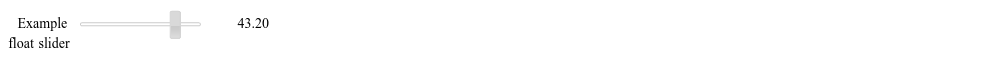

In [38]:
test_widget.widget

In [46]:
test_widget.value

43.2

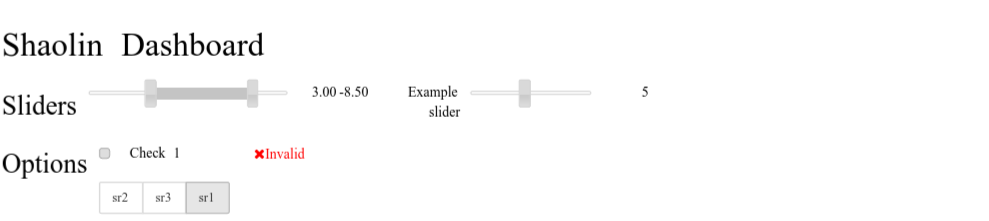

{'togglemenu': {'buttons': 'sr2', 'sr2': {'check_2': True, 'va2': True}, 'sr3': {'va3': True, 'check_3': True}, 'sr1': {'check_1': True, 'va1': True}}, 'range': (3.0, 8.5), 'example_slider': 5}
{'togglemenu': {'buttons': 'sr2', 'sr2': {'check_2': True, 'va2': True}, 'sr3': {'va3': True, 'check_3': True}, 'sr1': {'check_1': True, 'va1': True}}, 'range': (3.0, 8.0), 'example_slider': 5}
{'togglemenu': {'buttons': 'sr1', 'sr2': {'check_2': True, 'va2': True}, 'sr3': {'va3': True, 'check_3': True}, 'sr1': {'check_1': False, 'va1': False}}, 'range': (3.0, 8.5), 'example_slider': 5}


In [53]:
d1 = Dashboard(['r$n=sr1',['True$d=Check 1', '[[True]]$n=va1']])
d1.link('check_1','va1')
d2 = Dashboard(['r$n=sr2',['False$d=Check 2', '[[False]]$n=va2']])
d2.link('check_2','va2')
d3 = Dashboard(['r$n=sr3',['True$d=Check 3', '[[True]]$n=va3']])
d3.link('check_3','va3')
checkbox_column = ToggleMenu([
                               d1,
                               d2,
                               d3
                              ])
                   
block4 = ['c$n=sc1' ,['This is a textbox$d=text',
                      'sm$d=smul&o=["opt1","opt2", "optn"]'
                     ]
         ]
shaoscript_code = ['V$n=miau',
                     [
                       ['r$n=rtitle',['#Shaolin Dashboard$n=t1']],
                       ['r$n=r1',['##Sliders$n=r1st', '@((3., 9.),0, 10.,.5 )$n=range', '@(1,10,1,5)$d=Example slider']] ,
                       ['r$n=r2',['##Options$n=r2st',checkbox_column]]
                     ]
                  ]
def will_be_interactive(**kwargs):
    print (kwargs)
d = Dashboard(shaoscript_code, test)
d.widget

In [48]:
d.kwargs

{'is': 5,
 'range': (3.0, 9.0),
 'togglemenu': {'buttons': 'sr2',
  'sr1': {'check_1': True, 'va1': True},
  'sr2': {'check_2': False, 'va2': False},
  'sr3': {'check_3': True, 'va3': True}}}

In [49]:
d.interactive_kwargs

{'is': 5, 'range': (3.0, 9.0)}

In [51]:
d.mode_dict

{'active': ['togglemenu'],
 'all': ['miau', 'rtitle', 't1', 'r1', 'r1st', 'range', 'is', 'r2', 'r2st'],
 'interactive': ['range', 'is'],
 'passive': ['miau', 'rtitle', 't1', 'r1', 'r1st', 'r2', 'r2st']}

In [32]:
from shaolin.shaolin import shaoscript
import six
import numpy as np
from widget import Widget
import ipywidgets as wid
import traitlets

class Dashboard(object):
    
    def __init__(self, dash, func=None, mode='active', name=None):
        self.func = func
        self.dash = dash
        self.mode = mode
        if not name is None:
            self.name = name
        elif hasattr(dash,'name'):
            self.name = dash.name
        else:
            self.name = self.name_from_shaoscript(dash[0])
        self.mode_dict = {'active' : [],
                     'passive': [],
                     'interactive' : [],
                     'all':[]
                    }
        self.init_dash(self.dash)
        self.link_children(self.dash)
        if not self.func is None:
            self.observe(self.interact)
        
    def init_dashboard(self,dashboard):
        setattr(self,dashboard.name,dashboard)
        if dashboard.mode == 'interactive':
                self.mode_dict['interactive'] += [dashboard.name]
        elif dashboard.mode == 'passive':
            self.mode_dict['passive'] += [dashboard.name]
        else:
            self.mode_dict['active'] += [dashboard.name]
    
    def init_toggle_menu(self,children, kwargs):
        print(children,kwargs)
        dashboard = ToggleMenu(children)
        if 'name' in kwargs.keys():
            dashboard.name = kwargs['name']
        setattr(self,dashboard.name,dashboard)
        if dashboard.mode == 'interactive':
                self.mode_dict['interactive'] += [dashboard.name]
        elif dashboard.mode == 'passive':
            self.mode_dict['passive'] += [dashboard.name]
        else:
            self.mode_dict['active'] += [dashboard.name]
                
    def init_widget(self, shao, kwargs):
        widget = shaoscript(shao, kwargs)
        try:
            setattr(self,widget.name,widget)
        except Exception as e:
                e.args += (('Dont use widget attributes as shaoscript names,'
                            'they are reserved words! (You can use dashboard'
                            'as a generic name if you want)'),)
                raise e
            
        if 'mode' in kwargs.keys():
            if kwargs['mode'] == 'interactive':
                self.mode_dict['interactive'] += [widget.name]
            elif kwargs['mode'] == 'passive':
                self.mode_dict['passive'] += [widget.name]
            else:
                self.mode_dict['active'] += [widget.name]
        else:
            self.mode_dict['active'] += [widget.name]
        self.mode_dict['all'] += [widget.name]
            
    def interact(self, _):
        self.func(**self.kwargs)
        
    def link(self, name_1, name_2):
        widget_1 = getattr(self, name_1).target
        widget_2 = getattr(self, name_2).target
        setattr(self,'link_'+name_1+'_'+name_2, traitlets.link((widget_1, 'value'),(widget_2,'value')))
    
    def dlink(self, name_1, name_2):
        widget_1 = getattr(self, name_1).target
        widget_2 = getattr(self, name_2).target
        setattr(self,'link_'+name_1+'_'+name_2, traitlets.dlink((widget_1, 'value'),(widget_2,'value')))
    
    def unlink(self, name_1, name_2):
        link = getattr(self,'link_'+name_1+'_'+name_2)
        link.unlink()
        
    @property
    def visible(self):
        visible = False
        for name in self.mode_dict['all']:
            visible = visible or getattr(self,name).visible 
        return visible
    @visible.setter
    def visible(self,val):
        for name in self.mode_dict['all']:
            getattr(self,name).visible = val
    
    @property
    def value(self):
        return self.kwargs
    @property
    def kwargs(self):
        kw = {}
        for name in self.mode_dict['active']:
            kw[name] = getattr(self,name).value
        for name in self.mode_dict['interactive']:
            kw[name] = getattr(self,name).value
        return kw
    @property
    def interactive_kwargs(self):
        kw = {}
        for name in self.mode_dict['interactive']:
            kw[name] = getattr(self,name).value
        return kw
    @property
    def widget(self):
        return getattr(self,self.name).widget
   
    @staticmethod
    def name_from_shaoscript(string):
        params = string.split('$')[1].split('&')
        desc = None
        name = None
        for p in params:
            pname = p.split('=')[0]
            if pname in ['d','desc','description']:
                desc = p.split('=')[1]
            elif pname in ['n','name','N']:
                name = p.split('=')[1]
        if name is None and desc is None:
            return False
        elif name is None:
            return desc.lower().replace(' ','_')
        else:
            return name.lower().replace(' ','_')
    
    @staticmethod
    def read_shaolist(shaolist):
        
        try:
            len(shaolist)
        except TypeError:
            shaoscript = None
            kwargs = {}
            children = None
            return shaoscript, kwargs, children
        
        if shaolist[0] is ToggleMenu:
            shaoscript = ToggleMenu
            kwargs = {}
            children = shaolist[1]
        elif isinstance(shaolist,str):
            shaoscript = shaolist
            kwargs = {}
            children = None
        elif len(shaolist) == 1:
            #[(shaoscript,kwargs)]
            if isinstance(shaolist[0],tuple):
                kwargs = shaolist[0][1]
                shaoscript = shaolist[0][0]
                children = None
            #[shaoscript]
            else:
                shaoscript = shaolist[0]
                kwargs = {}
                children = None
        elif len(shaolist) == 2:
            #[(shaoscript, kwargs), children]
            if isinstance(shaolist[0],tuple):
                if shaolist[0][0] is ToggleMenu:
                    shaoscript = ToggleMenu
                    kwargs = shaolist[0][1]
                    children = shaolist[1]
                    return shaoscript, kwargs, children
                else:
                    kwargs = shaolist[0][1]
                    shaoscript = shaolist[0][0]
                    children = shaolist[1]
            #[shaoscript,children]
            else:
                kwargs = {}
                shaoscript = shaolist[0]
                children = shaolist[1]
        else:
            pass
                    
        return shaoscript, kwargs, children

    def observe(self, func, names='value'):
        for name in self.mode_dict['interactive']:
            getattr(self,name).observe(func, names=names)
    
    def link_children(self, shaolist):
        shaoscript, kwargs, children = self.read_shaolist(shaolist)
        if children is None:
            return
        else:
            name = self.name_from_shaoscript(shaoscript)
            for c in children:
                shao_c , kwargs_c, c_children = self.read_shaolist(c)
                if shao_c is None:
                    cname = c.name
                    print(cname,'miau')
                else:
                    cname = self.name_from_shaoscript(shao_c)
                getattr(self,name).target.children += (getattr(self,cname).widget,)
                self.link_children(c)
        
        
    def init_dash(self,dash):
        shaoscript, kwargs, children = self.read_shaolist(dash)
        if shaoscript is None:
            self.init_dashboard(dash)
        elif shaoscript is ToggleMenu:
            self.init_toggle_menu(children, kwargs)
            
        else:
            self.init_widget(shaoscript, kwargs)
        if children is None:
            return
        for c in children:
            self.init_dash(c)

class ToggleMenu(Dashboard):
    def __init__(self, children, description='', buttons_shao=None,name=None, button_labels=None):
        self.child_names = self.get_children_names(children)
        if button_labels is None:
            self.button_labels = self.child_names
        else:
            self.button_labels = button_labels
        
        if buttons_shao is None:
            opts = dict(zip(self.button_labels,self.child_names))
            buttons_shao  = ['@togs$N=buttons&d='+str(description)+'&o='+str(opts)]
            
        self.children_dash = children
        #children = ['fs$d=fs','fs$d=fs2']
        #buttons = ['r$n=buttons', buttons_shao]
        dash = ['V$n=toggleMenu',
                children +buttons_shao
               ]
        Dashboard.__init__(self, dash, func=None, name=name)
        self.update_toggle()
        self.buttons.target.observe(self.update_toggle)
    
    def get_children_names(self,children):
        names = []
        for c in children:
            try:
                names += [self.name_from_shaoscript(c)]
            except:
                names += [c.name]
            
        return names
    
    def update_toggle(self,_=None):

        for name in self.child_names:
            child = getattr(self,name)
            if name == self.buttons.value:
                child.visible = True
            else:
                child.visible = False
            